In [1]:
from pymongo import MongoClient
from bson.objectid import ObjectId

import time,datetime

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
style.use('ggplot')

In [3]:
conn = MongoClient()
db = conn.Tracker
collection = [db.james]# db.db2, db.dn2, db.james, db.leo
clean_data = []
for col in collection:
    cursor = col.find({})
    df = pd.DataFrame(list(cursor))

In [4]:
df.head()
df.describe()

,_id,day,hour,hr_value,latitude,longitude,minute,month,o2_value,second,step_value,timestamp,year
0,5c9b3935c4e5a668b7e9be2c,27,16,84,24.94519427,121.37227724,49,3,95,47,0,1.553677e+09,2019
1,5c9b393fc4e5a668b7e9be2e,27,16,84,24.94519427,121.37227724,49,3,95,57,0,1.553677e+09,2019
2,5c9b3949c4e5a668b7e9be30,27,16,84,24.94519427,121.37227724,50,3,95,7,0,1.553677e+09,2019
3,5c9b3953c4e5a668b7e9be32,27,16,84,24.94519427,121.37227724,50,3,95,17,0,1.553677e+09,2019
4,5c9b395dc4e5a668b7e9be34,27,16,79,24.94519427,121.37227724,50,3,98,27,0,1.553677e+09,2019


,day,hour,minute,month,second,timestamp,year
count,58451.000000,58451.000000,58451.000000,58451.000000,58451.000000,5.845100e+04,58451.0
mean,9.747207,12.183111,29.702623,3.889241,29.602813,1.554553e+09,2019.0
std,7.732356,6.588653,17.305048,0.313837,17.313281,3.719866e+05,0.0
min,1.000000,0.000000,0.000000,3.000000,0.000000,1.553677e+09,2019.0
25%,5.000000,7.000000,15.000000,4.000000,15.000000,1.554252e+09,2019.0
50%,8.000000,12.000000,30.000000,4.000000,29.000000,1.554584e+09,2019.0
75%,12.000000,18.000000,45.000000,4.000000,45.000000,1.554881e+09,2019.0
max,31.000000,23.000000,59.000000,4.000000,59.000000,1.555114e+09,2019.0


In [5]:
df.loc[[0]]

,_id,day,hour,hr_value,latitude,longitude,minute,month,o2_value,second,step_value,timestamp,year
0,5c9b3935c4e5a668b7e9be2c,27,16,84,24.94519427,121.37227724,49,3,95,47,0,1.553677e+09,2019


In [6]:
df['hr_value'] = df['hr_value'].replace('', pd.np.nan)
df['hr_value']=df['hr_value'].astype(float)

count     58450.000000
mean         24.586262
std         676.002454
min           9.000000
25%          10.000000
50%          10.000000
75%          10.000000
max      150098.000000
Name: timestamp, dtype: float64

<IPython.core.display.Javascript object>


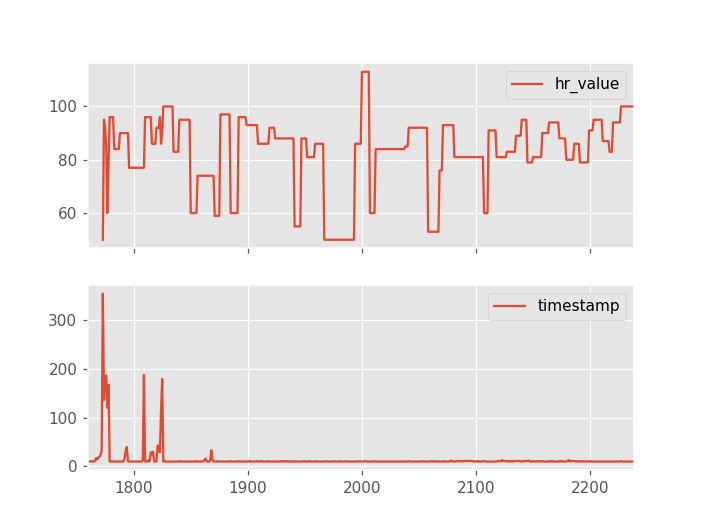

In [7]:
dftspdiff = df['timestamp'].diff()
dftspdiff.describe()
%matplotlib notebook
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

x = list(range(1760,2239))

df['hr_value'].loc[x].plot(ax=ax1, legend='hr_value')
dftspdiff.loc[x].plot(ax = ax2, legend='dftspdiff')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


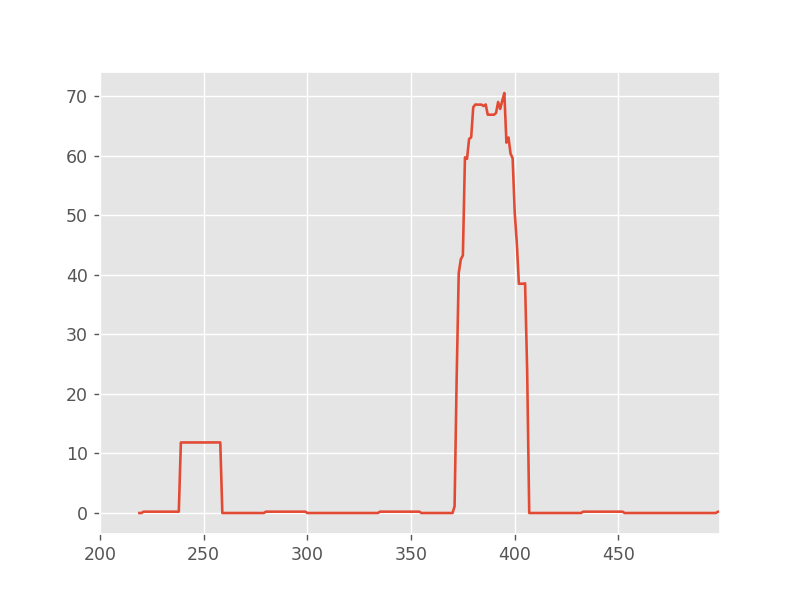

In [217]:
%matplotlib notebook
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
dftspdiff[200:500].rolling(20).std().plot(ax=ax1)
plt.show()

In [8]:
dftfdiffSTD = dftspdiff.rolling(20).std()

In [9]:
# find the place that std is smaller than 5
lis = []
changeFlag = 0
tempt = [0]
for i in range(len(dftfdiffSTD)):
    if dftfdiffSTD[i] < 5 and changeFlag == True and len(tempt) < 2:
        tempt.append(i)
        changeFlag = False
    if dftfdiffSTD[i] >= 5 and changeFlag == False and len(tempt) < 2:
        tempt.append(i-1)
        changeFlag = True
    if len(tempt) == 2:
        lis.append(tempt)
        tempt = []
print(lis)

[[0, 108], [212, 238], [259, 371], [407, 511], [532, 650], [672, 782], [805, 830], [1072, 1176], [1197, 1485], [1506, 1757], [1845, 1867], [1888, 2240], [2261, 2263], [2313, 2381], [2466, 2859], [2994, 3101], [3129, 3864], [3980, 4169], [4275, 4373], [4448, 4797], [4818, 4986], [5018, 5024], [5115, 5533], [5554, 5886], [5912, 5926], [6046, 6065], [6087, 6151], [6265, 6295], [6360, 6420], [6554, 6582], [6619, 6624], [6683, 6748], [6769, 6820], [6886, 6948], [6970, 7108], [7129, 7137], [7169, 7193], [7373, 7507], [7554, 7671], [7714, 7738], [7761, 7852], [7874, 7905], [7979, 8428], [8576, 8598], [8680, 8735], [8758, 8905], [8929, 8968], [9013, 9135], [9163, 9207], [9309, 9349], [9386, 9454], [9513, 9747], [9782, 10038], [10059, 10346], [10504, 10518], [10523, 10532], [10539, 10541], [10577, 10656], [10711, 10808], [10856, 10966], [11005, 11276], [11297, 11371], [11418, 11426], [11459, 11700], [11763, 11778], [11799, 14477], [14498, 14706], [14738, 15224], [15245, 15379], [15443, 15465], 

[55421, 56103] _id           5cb07fc2c4e5a668b7ebbafe
day                                 12
hour                                20
hr_value                            75
latitude                   24.94766349
longitude                 121.37534122
minute                               8
month                                4
o2_value                            98
second                              18
step_value                           0
timestamp                  1.55507e+09
year                              2019
Name: 55421, dtype: object


<IPython.core.display.Javascript object>


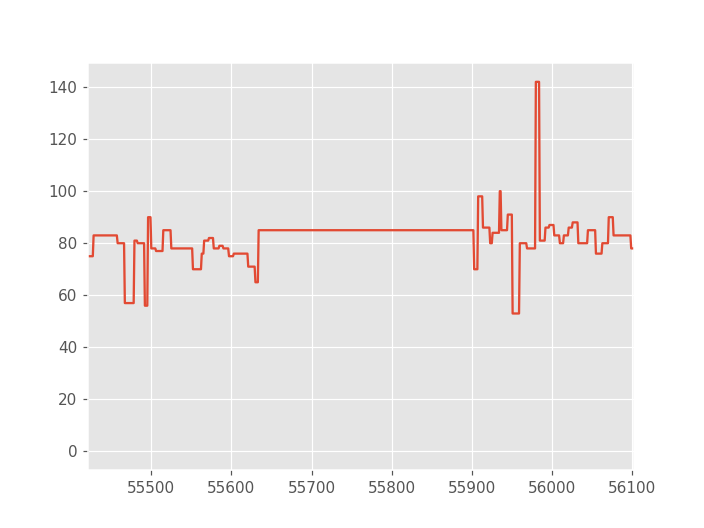

In [10]:
%matplotlib notebook

# for i in range(:-1):
i = -3
print(lis[i], df.iloc[lis[i][0]])
fig = plt.figure()
df['hr_value'][lis[i][0]:lis[i][1]].plot()
plt.show()

<IPython.core.display.Javascript object>


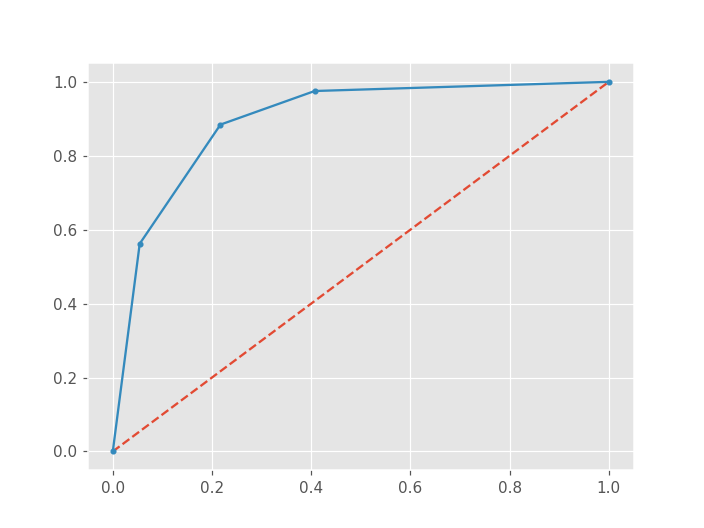

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

AUC: 0.895


In [20]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

%matplotlib notebook
fig = plt.figure()
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

[[-2.04582165 -0.13791624 -0.08071423  2.52203779  0.74616483 -0.90696374
  -0.22164773  1.0142675  -0.54154924  0.22661946 -0.64635911  1.37408466
   1.00905314  0.67411002  1.53458328  0.47971118 -0.91291053  2.48194524
   0.74236675  0.23154789]
 [-0.98726024  1.30120189  2.37734888  0.55391416  0.75226986  0.06465569
   0.01831726 -1.04361019 -0.00410306  0.5327589  -0.12339551  1.20399358
  -0.37995863  0.65601518  0.66679355 -0.77660361  0.26080007  0.55445754
  -0.21892143 -0.37608578]
 [-1.36673503  0.09375582  0.4662521   1.43778278  0.01003873  0.68297078
   2.11336547  0.62668583  1.49238922  0.89964631  0.4358654   2.39767354
   0.35109936 -0.55075986  0.9977144  -1.00699996  0.53052387 -0.6088508
   0.79903499 -0.17121177]] [0 0 1]


<IPython.core.display.Javascript object>


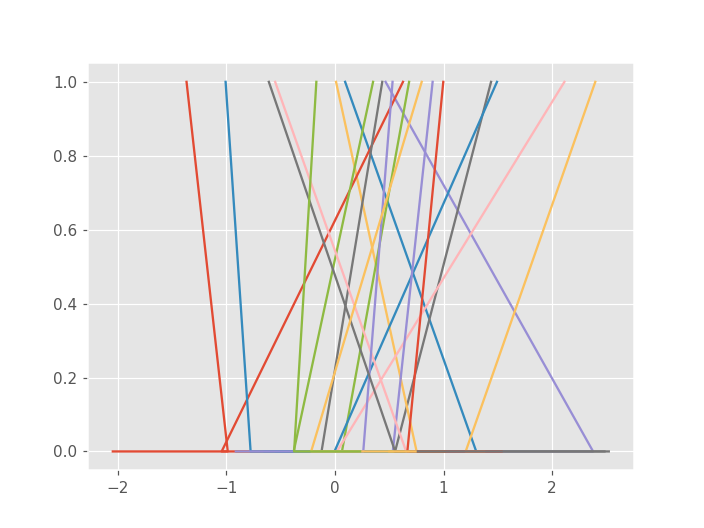

In [26]:
print(X[:3], y[:3])
fig = plt.figure()
plt.plot(X[:3], y[:3])
plt.show()